In [103]:
path = '../phd-model-process/'

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import scipy as sp
import scipy.stats as st

from helpers_pd import *

# Plotting
import seaborn as sns
sns.set()
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
# sns.set(style="darkgrid")
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
from matplotlib.patches import Ellipse, Rectangle

palette = ["#F44336", '#673AB7', '#3F51B5', '#009688', '#FF9800', '#4CAF50', '#03A9F4']

In [22]:
comp = pd.read_table(path + 'observations/conc_comp_cal.tss')
d13c = pd.read_table(path + 'observations/d13c_comp_cal.tss')
comp.head()
d13c.head()

,Jdays,Transect,IDcal,d13C,d13C.SD
0,188,N,N-188,-31.400000,0.500000
1,188,S,S-188,-31.233333,0.513160
2,188,V,V-188,-29.966667,0.404145
3,197,N,N-197,-31.200000,0.100000
4,197,S,S-197,-31.066667,0.450925


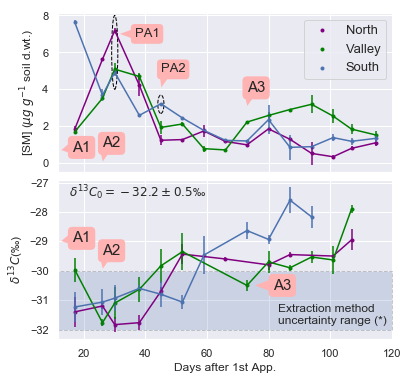

In [183]:
sns.set_context("paper")
sns.set(rc={'figure.figsize':(6.0, 6.)}) # Width, height, inches

fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)

# Observed Conc
nor_time_c = np.array(comp.loc[comp['Transect']=='N']['Jdays']-171)
val_time_c = np.array(comp.loc[comp['Transect']=='V']['Jdays']-171)
sou_time_c = np.array(comp.loc[comp['Transect']=='S']['Jdays']-171)
nor_obs_c = np.array(comp.loc[comp['Transect']=='N']['ug.g'])
val_obs_c = np.array(comp.loc[comp['Transect']=='V']['ug.g'])
sou_obs_c = np.array(comp.loc[comp['Transect']=='S']['ug.g'])

nor_err_c = np.array(comp.loc[comp['Transect']=='N']['ug.g.SD'])
val_err_c = np.array(comp.loc[comp['Transect']=='V']['ug.g.SD'])
sou_err_c = np.array(comp.loc[comp['Transect']=='S']['ug.g.SD'])

# Observed d13C
nor_time_d = np.array(d13c.loc[d13c['Transect']=='N']['Jdays']-171)
val_time_d = np.array(d13c.loc[d13c['Transect']=='V']['Jdays']-171)
sou_time_d = np.array(d13c.loc[d13c['Transect']=='S']['Jdays']-171)
nor_obs_d = np.array(d13c.loc[d13c['Transect']=='N']['d13C'])
val_obs_d = np.array(d13c.loc[d13c['Transect']=='V']['d13C'])
sou_obs_d = np.array(d13c.loc[d13c['Transect']=='S']['d13C'])

nor_err_d = np.array(d13c.loc[d13c['Transect']=='N']['d13C.SD'])
val_err_d = np.array(d13c.loc[d13c['Transect']=='V']['d13C.SD'])
sou_err_d = np.array(d13c.loc[d13c['Transect']=='S']['d13C.SD'])


# Plotting TOP
axes[0].errorbar(nor_time_c, nor_obs_c, nor_err_c, c="purple")
axes[0].scatter(nor_time_c, nor_obs_c, c="purple", marker='.', label="North")
axes[0].legend(loc="upper right")

axes[0].errorbar(val_time_c, val_obs_c, val_err_c, c="green")
axes[0].scatter(val_time_c, val_obs_c, c="green", marker='.', label="Valley")
axes[0].legend(loc="upper right")

axes[0].errorbar(sou_time_c, sou_obs_c, sou_err_c, c="C0")
axes[0].scatter(sou_time_c, sou_obs_c, c="C0", marker='.', label="South")
axes[0].legend(loc="upper right", prop={'size': 13})

# Plotting BOTTOM
axes[1].errorbar(nor_time_d, nor_obs_d, nor_err_d, c="purple")
axes[1].scatter(nor_time_d, nor_obs_d, c="purple", marker='.', label="North")
# axes[1].legend(loc="upper right")

axes[1].errorbar(val_time_d, val_obs_d, val_err_d, c="green")
axes[1].scatter(val_time_d, val_obs_d, c="green", marker='.', label="Valley")
# axes[1].legend(loc="upper right")

axes[1].errorbar(sou_time_d, sou_obs_d, sou_err_d, c="C0")
axes[1].scatter(sou_time_d, sou_obs_d, c="C0", marker='.', label="South")
# axes[1].legend(loc="upper right")

#
# bbox_props = dict(boxstyle="round", fc="w", ec="0.1", alpha=0.5)
# axes[0].text(30, 6, "Text", ha="center", va="center", size=40, bbox=bbox_props)

# Annotation EDITING STARTS HERE!

# CONCENTRATION
# A1
axes[0].annotate('A1', xy=(12, .7), 
                 xycoords='data', xytext=(13, 3), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))
# A2
axes[0].annotate('A2', xy=(26, 0), 
                 xycoords='data', xytext=(0, 20), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))
# A3
axes[0].annotate('A3', xy=(73, 3), 
                 xycoords='data', xytext=(0, 20), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))

# 1st black ellipse
el1 = Ellipse((30, 6), 2, 4, edgecolor="black", linestyle="--", fill=False)
axes[0].add_patch(el1)

# S1
axes[0].annotate('PA1', xy=(30, 7), 
                 xycoords='data', xytext=(20, 0), textcoords='offset points', 
                 size=13, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=el1, relpos=(.2, .5)
                                ))

# S2
axes[0].annotate('PA2', xy=(45, 4), 
                 xycoords='data', xytext=(0, 20), textcoords='offset points', 
                 size=13, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))

el2 = Ellipse((45, 3.2), 2, 1, edgecolor="black", linestyle="--", fill=False)
axes[0].add_patch(el2)


# ISOTOPES
# A1
axes[1].annotate('A1', xy=(12, -29), 
                 xycoords='data', xytext=(13, 3), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))
# A2
axes[1].annotate('A2', xy=(26, -30), 
                 xycoords='data', xytext=(0, 20), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))
# A3
axes[1].annotate('A3', xy=(75, -30.5), 
                 xycoords='data', xytext=(20, 0), textcoords='offset points', 
                 size=15, va="center",
                 bbox=dict(boxstyle="round", fc=(1., .7, .7), ec="none"),
                 arrowprops=dict(arrowstyle="wedge,tail_width=1.", 
                                 fc=(1., .7, .7), ec="none", patchA=None, patchB=None, relpos=(.2, .5)
                                ))

rec1 = Rectangle((10, -32), 110, 2, edgecolor="black", linestyle="--", fill=True, alpha=0.2)
axes[1].add_patch(rec1)
axes[1].annotate('Extraction method \nuncertainty range (*)', xy=(83, -31.8), 
                 xycoords='data')
axes[1].annotate('$\delta^{13}C_0=-32.2\pm 0.5$' + u'\u2030', xy=(15, -27.5), 
                 xycoords='data')

axes[0].set_ylabel("[SM] ($\mu g$ $g^{-1}$ soil d.wt.)")
axes[1].set_ylabel("$\delta ^{13}C$" + u'(\u2030)')
axes[1].set_xlabel("Days after 1st App.")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.05)

# fig.savefig("SI2_Apps.pdf")

In [83]:
197-171

26

In [94]:
238-171

67

In [95]:
50/23.

2.1739130434782608

In [96]:
20*2.17

43.4

In [178]:
196-171

25

In [179]:
238-171

67

In [181]:
244-171

73